# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Functions

## Utility

In [2]:
def find_datatypes(x):
    datatypes = {}
    for i in range(x.shape[1]):
        datatype = 'binary' if len(np.unique(x[:, i])) == 2 else 'numerical'
        datatypes[i] = datatype
    return datatypes

def keep_numerical(x, datatypes):
    numerical_indices = [True if datatypes[i] == 'numerical' else False for i in datatypes]
    x_numerical = x[:, numerical_indices]
    return x_numerical, numerical_indices

def keep_binary(x, datatypes):
    binary_indices = [True if datatypes[i] == 'binary' else False for i in datatypes]
    x_binary = x[:, binary_indices]
    return x_binary, binary_indices  


## Plotting

In [3]:
def draw_numerical(x, y, column_names, nrows, ncols):
    fig, axes = plt.subplots(nrows, ncols, figsize = (7 * ncols, 3 * nrows))
    axes = axes.ravel()
    colors = ['#66c2a5', '#8da0cb', '#fc8d62', '#e78ac3']

    for idx, ax in enumerate(axes):
        x_vals = x[:, idx]
        ax.set_title(column_names[idx])
        sns.boxplot(x=y, y=x_vals, hue=y, palette=colors, ax=ax)
        ax.set_facecolor('#fdfdf0')
        ax.get_legend().remove()
        
    fig.set_facecolor('#f0fff0')
    fig.tight_layout()
    plt.show()


def draw_binary(x, y, column_names, nrows, ncols):
    fig, axes = plt.subplots(nrows, ncols, figsize = (7 * ncols, 3 * nrows))
    axes = axes.ravel()
    colors = ['#66c2a5', '#8da0cb', '#fc8d62', '#e78ac3']

    for idx, ax in enumerate(axes):
        x_vals = x[:, idx]
        ax.set_title(column_names[idx])
        sns.countplot(x=x_vals, hue=y, palette=colors, ax=ax)
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['No', 'Yes'])
        ax.set_facecolor('#fdfdf0')
        ax.get_legend().remove()
        
    fig.set_facecolor('#f0fff0')
    fig.tight_layout()
    plt.show()
    

# Results

**Initialization**

In [4]:
df_data_raw = pd.read_csv('../data/train.csv', delimiter=',')
data_raw = df_data_raw.to_numpy()
column_names = df_data_raw.columns[:-1]
x_train_full_raw = data_raw[:, :-1]
y_train_full = data_raw[:, -1]

datatypes = find_datatypes(x_train_full_raw)
x_raw_numerical, indices_numerical = keep_numerical(x_train_full_raw, datatypes)
x_raw_binary, indices_binary = keep_binary(x_train_full_raw, datatypes)

numerical_column_names = column_names[indices_numerical]
binary_column_names = column_names[indices_binary]

**Numerical**

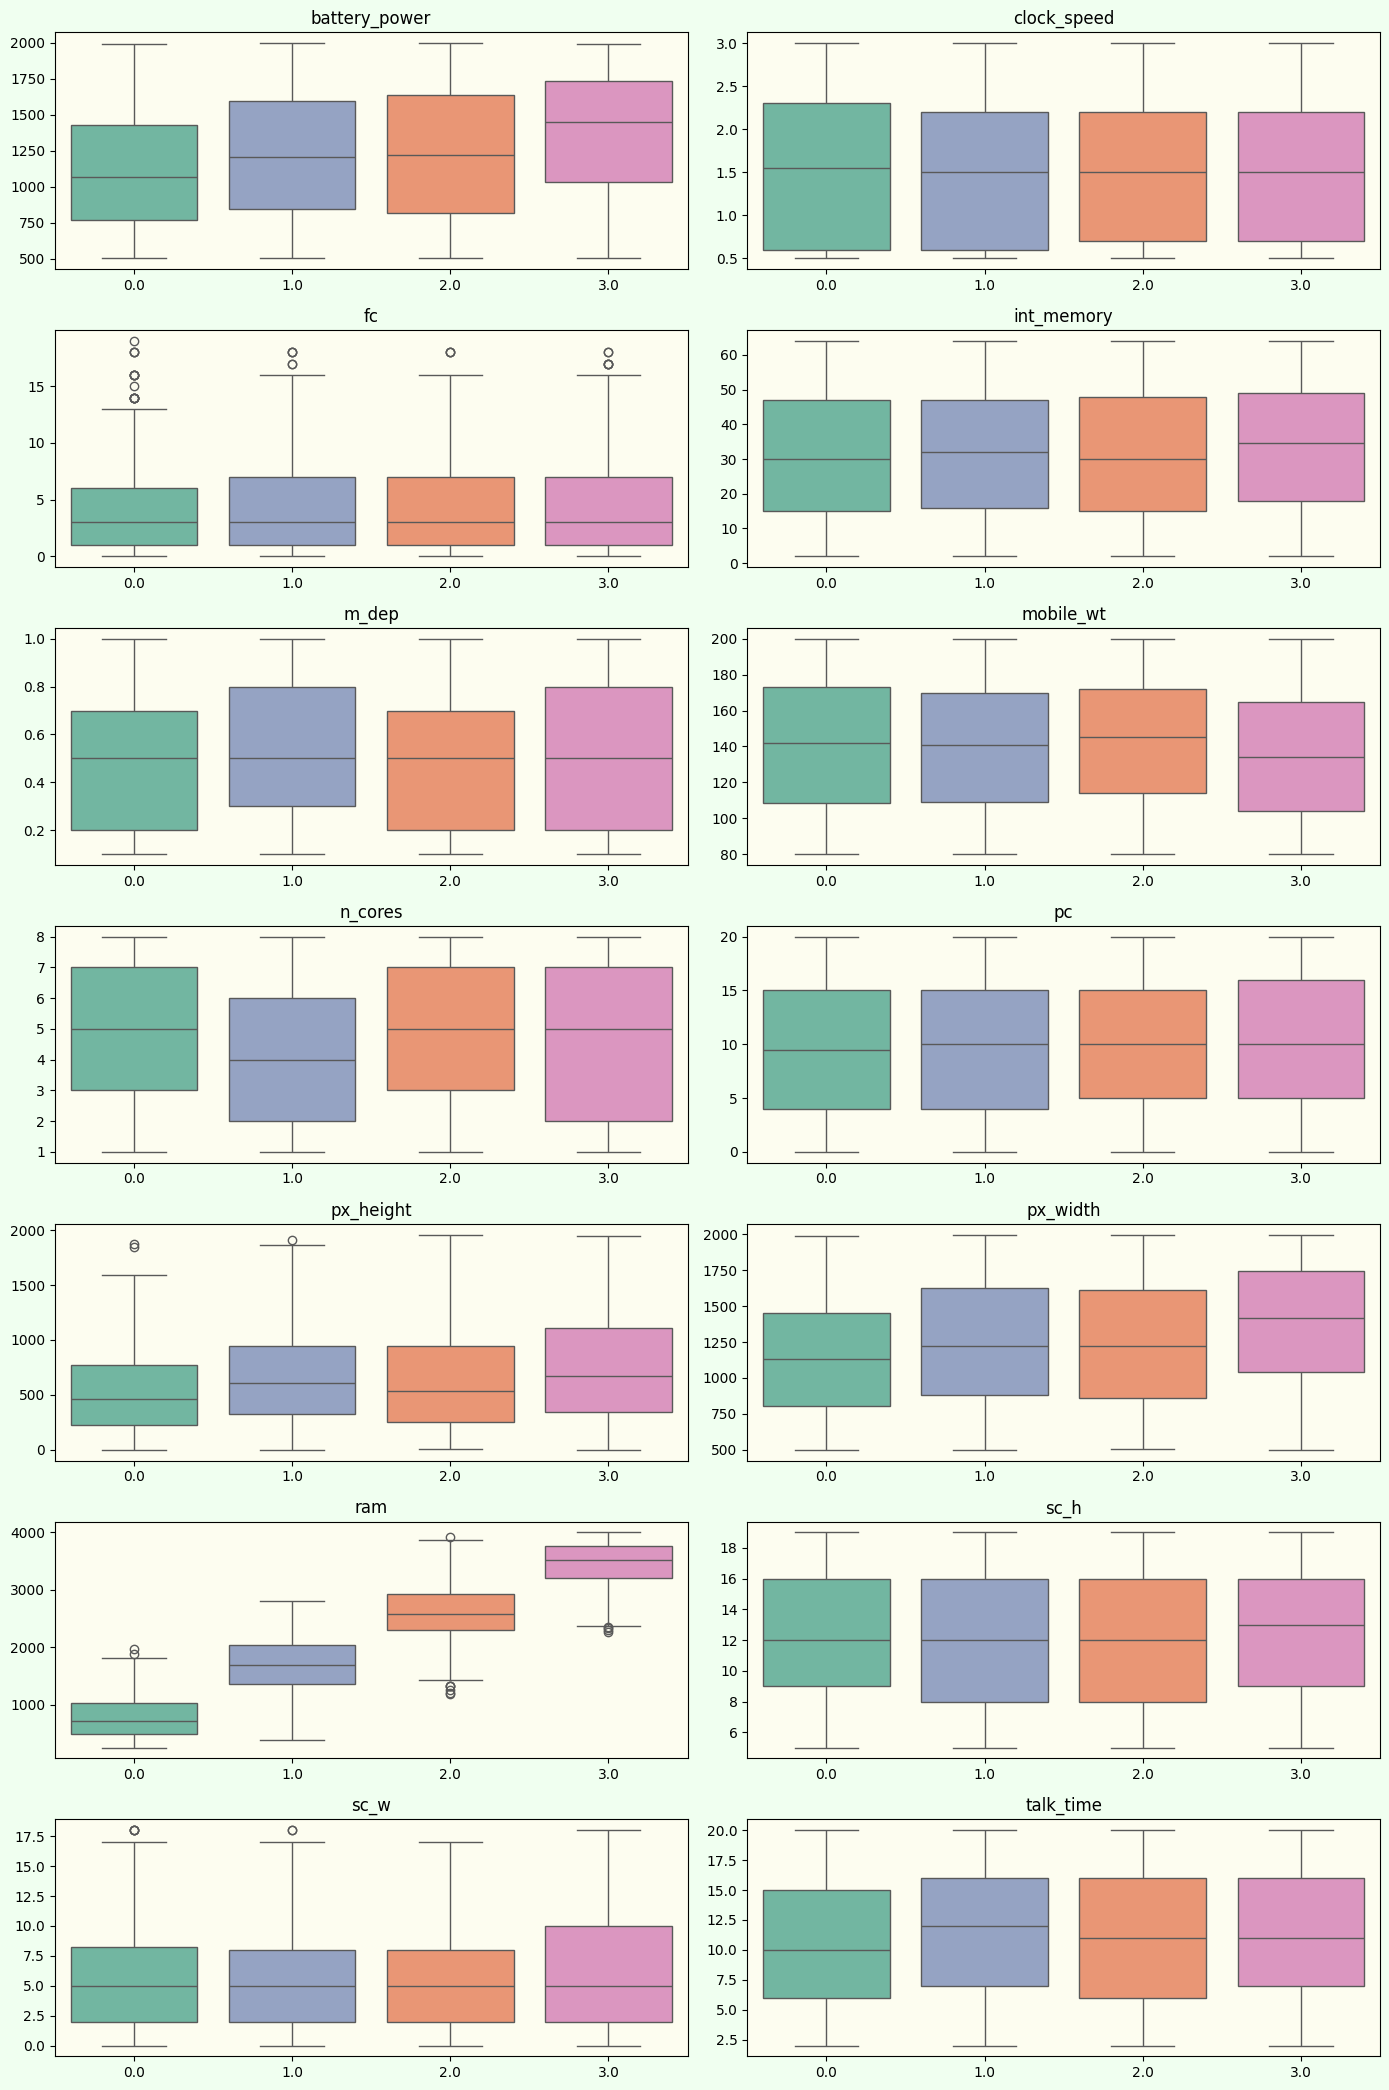

In [5]:
draw_numerical(x_raw_numerical, y_train_full, column_names=numerical_column_names, nrows=7, ncols=2)

**Binary**

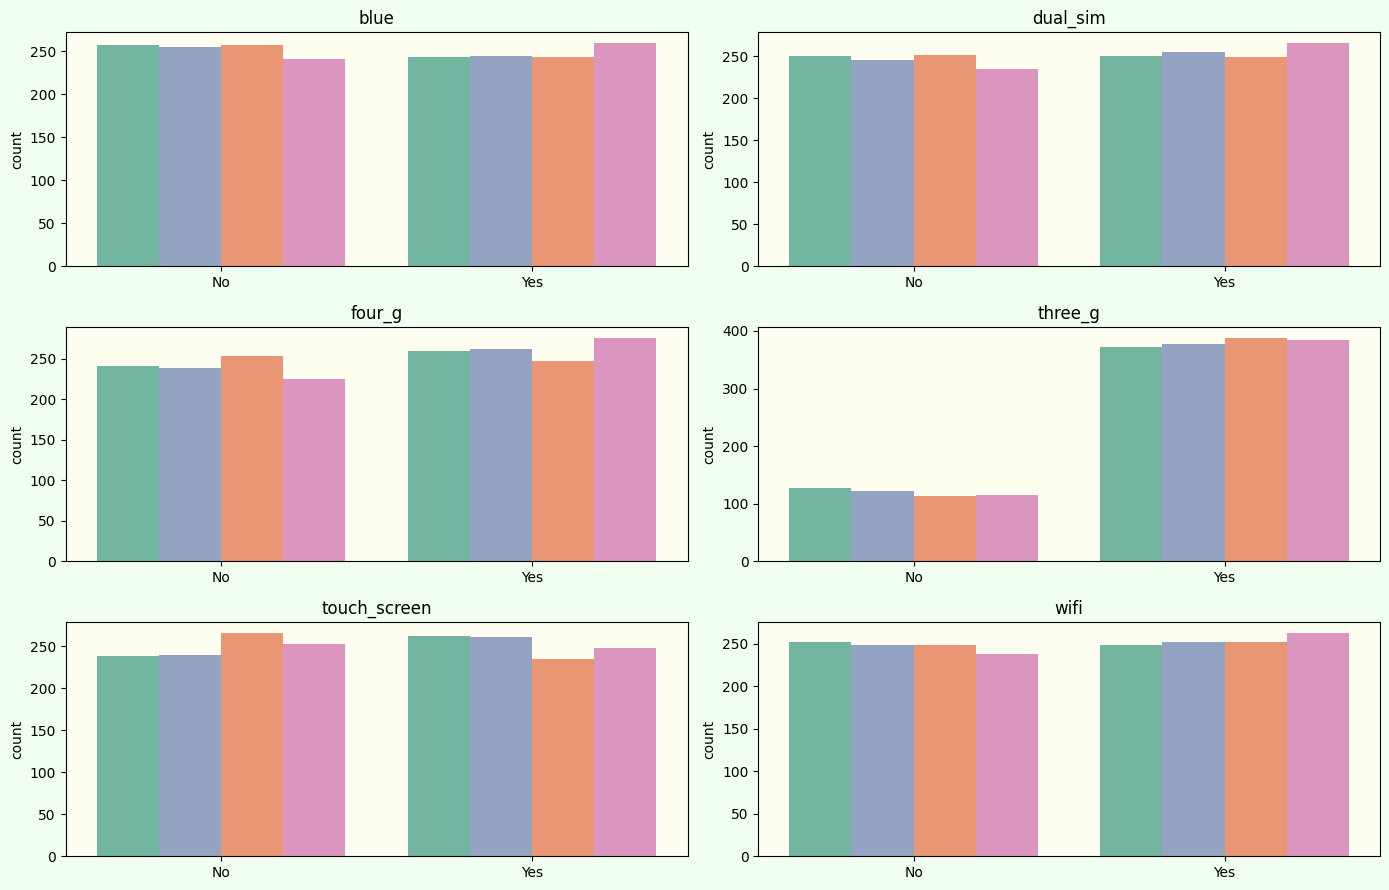

In [6]:
draw_binary(x_raw_binary, y_train_full, column_names=binary_column_names, nrows=3, ncols=2)